<H2>DataScience Capstone Project:</H2>
<H1>The Battle of the Neighborhoods</H1>
<H3>An analysis of various neighborhoods in different cities</H3>

This Notebook consists of two parts. The first part defines the problem statement, and the potential solution for that problem statement. The second part of the notebook describes the actual solution for the problem statement.

The whole notebook will be submited twice. First as part of the assigment of week 4, the second time as the final result for week 5's assignment. 

<H2>Section 1 - introduction</H2>

<H3>Problem statement</H3>

My customer wants to open a new coffee-shop in Oslo, Norway. He hasn't decided yet on the location, and he has asked me to provide a suggestion what the best location is.

The best location in this case is related to other venues in the vincinity that attract customers. This could be restaurants, parks, university faculties, companies. But also the lack of other coffee-venues in the area.

<H3>Data selection and requirements</H3>

To answer the questions, I want to source data from Foursquare. To do the analysis I will use Jupyter notebooks and python 3.7. Libraries I'm going to use include map-visualization, analytical libraries and libraries that make it convenient to work with datasets.

To answer the question for the customer, I want to create lists of different types of venues. Once I have categorized and clustered them, I want to plot them on a map. Based on this, I want to be able to show the best area for the coffee-shop to be opened.

<H2>Section 2 - Data</H2>

In [1]:
!conda update -n base -c defaults conda

Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs: 
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.7.12               |           py37_0         3.0 MB
    tqdm-4.36.1                |             py_0          50 KB
    openssl-1.1.1d             |       h7b6447c_2         3.7 MB
    conda-package-handling-1.6.0|   py37h7b6447c_0         872 KB
    ------------------------------------------------------------
                                           Total:         7.6 MB

The following NEW packages will be INSTALLED:

    conda-package-handling: 1.6.0-py37h7b6447c_0
    tqdm:                   4.36.1-py_0         

The following packages will be UPDATED:

    conda:                  4.5.12-py37_0        --> 4.7.12-py37_0    
    openssl:                1.1.1d-h7b6447c_1    --> 1.1.1d-h7b6447c_2


conda-4.7.

In [2]:
!conda install -c conda-forge folium --yes

Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::numba==0.42.0=py36h962f231_0
  - defaults/linux-64::blaze==0.11.3=py36_0
done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs:
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-3.2.0               |           py36_0         770 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    folium-0.10.0              |             py_0          59 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    tbb-2019.8          

In [3]:
# first ensure that potentially required libraries are loaded
import pandas as pd
import numpy as np
import json

#from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pylab as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
print('Libraries imported.')

Libraries imported.


<H3>Import the data</H3>

Let's have a look at the first data set. 
Do a request to Foursquare for the central area of the city of Oslo in Norway and check the number of venues that are relevant for our research. 

In [4]:
# Foursquare credentials
CLIENT_ID = 'WVPNGH1SOPRB2TGFZISLMACZQKWIYYLBEAY2DMTLYK2IH2I2' # your Foursquare ID
CLIENT_SECRET = '5LWU1FW00NVCZB4QH0JJ4KTHJ0LUFMPTAY1HULJWU0MPOLRG' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WVPNGH1SOPRB2TGFZISLMACZQKWIYYLBEAY2DMTLYK2IH2I2
CLIENT_SECRET:5LWU1FW00NVCZB4QH0JJ4KTHJ0LUFMPTAY1HULJWU0MPOLRG


In [5]:
# Find the coordinates for the city hall in central Oslo
address = 'Fridtjof Nansens plass, Oslo, Norway'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

59.9128945 10.7338271


In [6]:
search_query = "Coffee"
radius = 1500
print(search_query + '....OK!')

Coffee....OK!


In [7]:
coffee_url= 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
#coffee_url

In [8]:
coffee_results = requests.get(coffee_url).json()
#coffee_results

# assign relevant information to venues
venues = coffee_results['response']['venues']
# transform venues to a dataframe
dfv = json_normalize(venues)
dfv.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4b8a5f67f964a520606a32e3,Akersgata 2,NO,Oslo,Norge,NaN,381,"[Akersgata 2, 0158 Oslo, Norge]","[{'label': 'display', 'lat': 59.91049268619492...",59.910493,10.738695,NaN,0158,Oslo,People & Coffee,v-1570346041
1,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4ff1a1ede4b01885369590ea,Akersgata 35,NO,Oslo,Norge,Egertorget,436,"[Akersgata 35 (Egertorget), 0158 Oslo, Norge]","[{'label': 'display', 'lat': 59.91327046962819...",59.913270,10.741610,NaN,0158,Oslo,Wayne's Coffee,v-1570346041
2,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",False,4e9d579c6c251c381df15d69,NaN,NO,NaN,Norge,NaN,74,[Norge],"[{'label': 'display', 'lat': 59.91283194000694...",59.912832,10.735162,NaN,NaN,NaN,Coffee Club,v-1570346041
3,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",False,5676c9b7498e82133a8d5b5d,NaN,NO,NaN,Norge,NaN,336,[Norge],"[{'label': 'display', 'lat': 59.914106, 'lng':...",59.914106,10.739354,NaN,NaN,NaN,coffee lounge Karl Johans gate Hotell,v-1570346041
4,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",False,50fd5063e4b0ef4ba4a7396f,Grensen 30,NO,Oslo,Norge,at Pilestredet,456,"[Grensen 30 (at Pilestredet), 0180 Oslo, Norge]","[{'label': 'display', 'lat': 59.91445680256309...",59.914457,10.741382,NaN,0180,Oslo,Wayne's Coffee,v-1570346041


In [9]:
# Now for some data-wrangling. Drop the columns I don't need. 
filtered_columns = ['name', 'categories'] + [col for col in dfv.columns if col.startswith('location.')] +  ['id']
dfv_filtered = dfv.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dfv_filtered['categories'] = dfv_filtered.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dfv_filtered.columns = [column.split('.')[-1] for column in dfv_filtered.columns]

dfv_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,People & Coffee,Coffee Shop,Akersgata 2,NO,Oslo,Norge,NaN,381,"[Akersgata 2, 0158 Oslo, Norge]","[{'label': 'display', 'lat': 59.91049268619492...",59.910493,10.738695,NaN,0158,Oslo,4b8a5f67f964a520606a32e3
1,Wayne's Coffee,Coffee Shop,Akersgata 35,NO,Oslo,Norge,Egertorget,436,"[Akersgata 35 (Egertorget), 0158 Oslo, Norge]","[{'label': 'display', 'lat': 59.91327046962819...",59.913270,10.741610,NaN,0158,Oslo,4ff1a1ede4b01885369590ea
2,Coffee Club,Café,NaN,NO,NaN,Norge,NaN,74,[Norge],"[{'label': 'display', 'lat': 59.91283194000694...",59.912832,10.735162,NaN,NaN,NaN,4e9d579c6c251c381df15d69
3,coffee lounge Karl Johans gate Hotell,Café,NaN,NO,NaN,Norge,NaN,336,[Norge],"[{'label': 'display', 'lat': 59.914106, 'lng':...",59.914106,10.739354,NaN,NaN,NaN,5676c9b7498e82133a8d5b5d
4,Wayne's Coffee,Café,Grensen 30,NO,Oslo,Norge,at Pilestredet,456,"[Grensen 30 (at Pilestredet), 0180 Oslo, Norge]","[{'label': 'display', 'lat': 59.91445680256309...",59.914457,10.741382,NaN,0180,Oslo,50fd5063e4b0ef4ba4a7396f
5,Coffee 2 go,Café,NaN,NO,NaN,Norge,NaN,1273,[Norge],"[{'label': 'display', 'lat': 59.911924, 'lng':...",59.911924,10.756557,NaN,NaN,NaN,4bb3464542959c740fb2212c
6,Wraps & Coffee,Mexican Restaurant,Akersgata 32,NO,Oslo,Norge,NaN,522,"[Akersgata 32, 0180 Oslo, Norge]","[{'label': 'display', 'lat': 59.9142235813742,...",59.914224,10.742800,NaN,0180,Oslo,4bb063a0f964a52088433ce3
7,Wayne's Coffee,Coffee Shop,Ullevålsveien 1,NO,Oslo,Norge,St. Olavs gate,830,"[Ullevålsveien 1 (St. Olavs gate), 0165 Oslo, ...","[{'label': 'display', 'lat': 59.91818516500466...",59.918185,10.744316,NaN,0165,Oslo,4ce3bfb61594236a75dcf849
8,Low Carb & Coffee,Coffee Shop,NaN,NO,NaN,Norge,NaN,977,[Norge],"[{'label': 'display', 'lat': 59.921357, 'lng':...",59.921357,10.729137,NaN,NaN,NaN,5042074de4b0ba0a528f6b88
9,Habits Coffee,Coffee Shop,Pilestredet 55,NO,Oslo,Norge,NaN,1097,"[Pilestredet 55, Oslo, Norge]","[{'label': 'display', 'lat': 59.922709, 'lng':...",59.922709,10.732042,Bislett,NaN,Oslo,544cec3f498eb6077fb8267c


Now we have a list of all Coffee shops available in Foursquare that are located in Oslo within proximity of the City Hall. Now let's plot this on a map and save the variable for later use. 

In [10]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the City Hall

# add a red  marker to represent the City Hall
folium.Circle(
    [latitude, longitude],
    radius=20,
    color='red',
    popup='City Hall',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Coffee Shops as blue markers
for lat, lng, label in zip(dfv_filtered.lat, dfv_filtered.lng, dfv_filtered.categories):
    folium.Circle(
        [lat, lng],
        radius=15,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

Now we have the locations of the near by shops where you can buy a coffee. Now I want to plot the venues or locations that are popular, or parks, or sight seeing locations.

In [11]:
categoryId = "4bf58dd8d48988d163941735" #category id for parks
#search_query2 = "Park"
popular_url= 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, categoryId, radius, LIMIT)
popular_results = requests.get(popular_url).json()
# assign relevant information to the venues
popular = popular_results['response']['venues']
# transform to a dataframe
dfvp = json_normalize(popular)
dfvp.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",False,57e0721a498e98839e0ba82a,"Kronprinsesse Märthas plass 1, 0160 Oslo, Norway",NO,Oslo,Norge,NaN,95,"[Kronprinsesse Märthas plass 1, 0160 Oslo, Nor...","[{'label': 'display', 'lat': 59.91229, 'lng': ...",59.912290,10.732613,NaN,NaN,Oslo,Kronprinsesse Märthas plass,v-1570346076
1,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",False,4bb89d62314e95218990489d,Karl Johans gate,NO,Oslo,Norge,NaN,244,"[Karl Johans gate, Oslo, Norge]","[{'label': 'display', 'lat': 59.91444768328313...",59.914448,10.736936,NaN,NaN,Oslo,Studenterlunden,v-1570346076
2,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",False,4c03c44c187ec928b40cb67b,Slottsparken,NO,Oslo,Norge,NaN,437,"[Slottsparken, 0010 Oslo, Norge]","[{'label': 'display', 'lat': 59.91638006600883...",59.916380,10.730215,NaN,0010,Oslo,Slottsparken,v-1570346076
3,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",False,4b0588b8f964a5206bd622e3,Karl Johans gate,NO,Oslo,Norge,Rosenkrantz gate,216,"[Karl Johans gate (Rosenkrantz gate), 0161 Osl...","[{'label': 'display', 'lat': 59.913854, 'lng':...",59.913854,10.737200,NaN,0161,Oslo,Spikersuppa,v-1570346076
4,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",False,5311b41a498e81326dfde003,Strandpromenaden 2,NO,Oslo,Norge,NaN,983,"[Strandpromenaden 2, 0252 Oslo, Norge]","[{'label': 'display', 'lat': 59.90645743080112...",59.906457,10.721755,NaN,0252,Oslo,Skulpturparken på Tjuvholmen,v-1570346076


In [12]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns2 = ['name', 'categories'] + [col for col in dfvp.columns if col.startswith('location.')] + ['id']
dfvp_filtered = dfvp.loc[:, filtered_columns2]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dfvp_filtered['categories'] = dfvp_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dfvp_filtered.columns = [column.split('.')[-1] for column in dfvp_filtered.columns]

dfvp_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Kronprinsesse Märthas plass,Park,"Kronprinsesse Märthas plass 1, 0160 Oslo, Norway",NO,Oslo,Norge,NaN,95,"[Kronprinsesse Märthas plass 1, 0160 Oslo, Nor...","[{'label': 'display', 'lat': 59.91229, 'lng': ...",59.912290,10.732613,NaN,NaN,Oslo,57e0721a498e98839e0ba82a
1,Studenterlunden,Park,Karl Johans gate,NO,Oslo,Norge,NaN,244,"[Karl Johans gate, Oslo, Norge]","[{'label': 'display', 'lat': 59.91444768328313...",59.914448,10.736936,NaN,NaN,Oslo,4bb89d62314e95218990489d
2,Slottsparken,Park,Slottsparken,NO,Oslo,Norge,NaN,437,"[Slottsparken, 0010 Oslo, Norge]","[{'label': 'display', 'lat': 59.91638006600883...",59.916380,10.730215,NaN,0010,Oslo,4c03c44c187ec928b40cb67b
3,Spikersuppa,Park,Karl Johans gate,NO,Oslo,Norge,Rosenkrantz gate,216,"[Karl Johans gate (Rosenkrantz gate), 0161 Osl...","[{'label': 'display', 'lat': 59.913854, 'lng':...",59.913854,10.737200,NaN,0161,Oslo,4b0588b8f964a5206bd622e3
4,Skulpturparken på Tjuvholmen,Park,Strandpromenaden 2,NO,Oslo,Norge,NaN,983,"[Strandpromenaden 2, 0252 Oslo, Norge]","[{'label': 'display', 'lat': 59.90645743080112...",59.906457,10.721755,NaN,0252,Oslo,5311b41a498e81326dfde003
5,Festningsparken,Park,Akershus festning,NO,Oslo,Norge,NaN,329,"[Akershus festning, 0150 Oslo, Norge]","[{'label': 'display', 'lat': 59.91010571812469...",59.910106,10.735785,NaN,0150,Oslo,4c0a481e6071a5935a3cdf32
6,Dronningparken,Park,Slottsparken,NO,Oslo,Norge,NaN,590,"[Slottsparken, 0256 Oslo, Norge]","[{'label': 'display', 'lat': 59.91578431287911...",59.915784,10.724952,NaN,0256,Oslo,4c2f3d5fed37a593c9db6603
7,Elgsletta,Park,Nylandsveien,NO,Oslo,Norge,Lakkegata,1578,"[Nylandsveien (Lakkegata), Oslo, Norge]","[{'label': 'display', 'lat': 59.91606934932158...",59.916069,10.761387,NaN,NaN,Oslo,51aa3155498ee244ae995cd6
8,Kontraskjæret,Park,Kontraskjæret,NO,Oslo,Norge,NaN,326,"[Kontraskjæret, 0151 Oslo, Norge]","[{'label': 'display', 'lat': 59.91014687807973...",59.910147,10.735877,NaN,0151,Oslo,4c0a41e06071a593ed33df32
9,Vaterlandsparken,Park,Oslo,NO,NaN,Norge,Grønland,1203,"[Oslo (Grønland), 0187, Norge]","[{'label': 'display', 'lat': 59.91211035441228...",59.912110,10.755337,NaN,0187,NaN,52ca6bbb498e9530d0a3f8c5


In [14]:
# only keep the items that are category "Park"
dfvp_park = dfvp_filtered
dfvp_park = dfvp_park.loc[dfvp_park.categories == "Park"]
dfvp_park

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Kronprinsesse Märthas plass,Park,"Kronprinsesse Märthas plass 1, 0160 Oslo, Norway",NO,Oslo,Norge,NaN,95,"[Kronprinsesse Märthas plass 1, 0160 Oslo, Nor...","[{'label': 'display', 'lat': 59.91229, 'lng': ...",59.912290,10.732613,NaN,NaN,Oslo,57e0721a498e98839e0ba82a
1,Studenterlunden,Park,Karl Johans gate,NO,Oslo,Norge,NaN,244,"[Karl Johans gate, Oslo, Norge]","[{'label': 'display', 'lat': 59.91444768328313...",59.914448,10.736936,NaN,NaN,Oslo,4bb89d62314e95218990489d
2,Slottsparken,Park,Slottsparken,NO,Oslo,Norge,NaN,437,"[Slottsparken, 0010 Oslo, Norge]","[{'label': 'display', 'lat': 59.91638006600883...",59.916380,10.730215,NaN,0010,Oslo,4c03c44c187ec928b40cb67b
3,Spikersuppa,Park,Karl Johans gate,NO,Oslo,Norge,Rosenkrantz gate,216,"[Karl Johans gate (Rosenkrantz gate), 0161 Osl...","[{'label': 'display', 'lat': 59.913854, 'lng':...",59.913854,10.737200,NaN,0161,Oslo,4b0588b8f964a5206bd622e3
4,Skulpturparken på Tjuvholmen,Park,Strandpromenaden 2,NO,Oslo,Norge,NaN,983,"[Strandpromenaden 2, 0252 Oslo, Norge]","[{'label': 'display', 'lat': 59.90645743080112...",59.906457,10.721755,NaN,0252,Oslo,5311b41a498e81326dfde003
5,Festningsparken,Park,Akershus festning,NO,Oslo,Norge,NaN,329,"[Akershus festning, 0150 Oslo, Norge]","[{'label': 'display', 'lat': 59.91010571812469...",59.910106,10.735785,NaN,0150,Oslo,4c0a481e6071a5935a3cdf32
6,Dronningparken,Park,Slottsparken,NO,Oslo,Norge,NaN,590,"[Slottsparken, 0256 Oslo, Norge]","[{'label': 'display', 'lat': 59.91578431287911...",59.915784,10.724952,NaN,0256,Oslo,4c2f3d5fed37a593c9db6603
7,Elgsletta,Park,Nylandsveien,NO,Oslo,Norge,Lakkegata,1578,"[Nylandsveien (Lakkegata), Oslo, Norge]","[{'label': 'display', 'lat': 59.91606934932158...",59.916069,10.761387,NaN,NaN,Oslo,51aa3155498ee244ae995cd6
8,Kontraskjæret,Park,Kontraskjæret,NO,Oslo,Norge,NaN,326,"[Kontraskjæret, 0151 Oslo, Norge]","[{'label': 'display', 'lat': 59.91014687807973...",59.910147,10.735877,NaN,0151,Oslo,4c0a41e06071a593ed33df32
9,Vaterlandsparken,Park,Oslo,NO,NaN,Norge,Grønland,1203,"[Oslo (Grønland), 0187, Norge]","[{'label': 'display', 'lat': 59.91211035441228...",59.912110,10.755337,NaN,0187,NaN,52ca6bbb498e9530d0a3f8c5


I have now created a dataframe containing the parks in the same neighborhood, which are shown on the map below.

In [15]:
parks_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the City Hall

# add a red  marker to represent the City Hall
folium.Circle(
    [latitude, longitude],
    radius=20,
    color='red',
    popup='City Hall',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(parks_map)

# add the Parks as green markers
for lat, lng, label in zip(dfvp_park.lat, dfvp_park.lng, dfvp_park.categories):
    folium.Circle(
        [lat, lng],
        radius=50,
        color='green',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(parks_map)

# display map
parks_map

And now combine the two maps.

In [16]:
combined_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the City Hall

# add a red  marker to represent the City Hall
folium.Circle(
    [latitude, longitude],
    radius=20,
    color='red',
    popup='City Hall',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(combined_map)

# add the Parks as green markers
for lat, lng, label in zip(dfvp_park.lat, dfvp_park.lng, dfvp_park.categories):
    folium.Circle(
        [lat, lng],
        radius=50,
        color='green',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(combined_map)

# add the Coffee Shops as blue markers
for lat, lng, label in zip(dfv_filtered.lat, dfv_filtered.lng, dfv_filtered.categories):
    folium.Circle(
        [lat, lng],
        radius=15,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(combined_map)
    
# display map
combined_map

Now we have an overview in a combined map with the locations of existing coffee shops, and the location of nearby parks. We can make some decisions based on visual analysis and conclude that there are plenty of opportunities of coffee shops in the vincinity of a park. We only need to decide which park is the best to open a coffee shop nearby.

<H3>Numbers and supporting graphs</H3>
Now let's create some supporting graphs of the data we have used.

In [17]:
dfvp_park["name"].count()

40

In [18]:
dfv["name"].count()

21

In [19]:
dist = dfvp_park[["distance","name"]]
dist2 = dfv_filtered[["distance","name"]]

In [50]:
dist

,distance,name
0,95,Kronprinsesse Märthas plass
1,216,Spikersuppa
2,244,Studenterlunden
3,437,Slottsparken
4,983,Skulpturparken på Tjuvholmen
5,590,Dronningparken
6,329,Festningsparken
7,326,Kontraskjæret
8,1578,Elgsletta
9,1569,St. Hanshaugen


In [51]:
dist2

,distance,name
0,381,People & Coffee
1,436,Wayne's Coffee
2,74,Coffee Club
3,336,coffee lounge Karl Johans gate Hotell
4,456,Wayne's Coffee
5,1023,Wayne's Coffee
6,522,Wraps & Coffee
7,1273,Coffee 2 go
8,830,Wayne's Coffee
9,1097,Habits Coffee


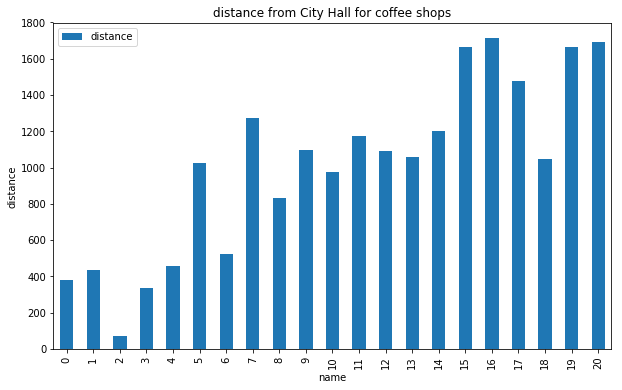

In [52]:
dist2.plot(kind='bar', figsize=(10, 6))
plt.xlabel('name')
plt.ylabel('distance')
plt.title('distance from City Hall for coffee shops')
plt.show()